# Spiral Optimization Algorithm (SOA)

## Motivation

The motivation of this repository is purely to learn about how to implement Spiral Optimization Algorithm (SOA) for $n$-dimensional optimization problem. That being said, this repository will not dive deep in the intuition why or how this algorithm work. Reader who interested can see the reference below.  

## Algorithm  
The main idea for SOA, is to "rotate" a set of guesses to the solution of the problem. Therefore, the problem is to how to "rotate" the guesses. The algorithm can be found bellow:

0. Set the number of search points $m \geq 2$ and maximum iteration number. 
For $k$ in range of maximum iteration, do the following:  
1. Place the initial search points $x_i(0)\in \mathbb{R}^n (i = 1, \dots, m)$ and determine the center $x^*(0) = x_{i_b}(0), i_b = \arg\min_{i = 1,\dots, m}\left\{ f(x_i(0))\right\}$, and then set $k =0$
2. Update the search points 
\begin{equation}
x_i(k+1) = x^*(k) + r(k)R^{(n)}(\theta)(x_i(k) - x^*(k)) (i = 1, \dots, m)
\end{equation}
3. Update the center:
\begin{equation}
x^*(k+1) = \begin{cases}
x_{i_b}(k+1), \quad (\text{if } f(x_{i_b}(k+1)) < f(x^*(k))) \\
x^*(k), \quad (\text{otherwise})
\end{cases}
\end{equation}
where $i_b = \arg\min_{i = 1,\dots, m}\left\{ f(x_i(0))\right\}$

If the iteration has complete, the solution is $x^*(k)$

$R(\theta)^{(n)}$ is a product matrix of matrix rotation as equation below: 
\begin{equation}
R^{(n)}(\theta) := \prod_{i=1}^{n-1}\left( \prod_{j=1}^i R_{n-i,n+1-j}^{(n)}\right)
\end{equation}
with $R^{(n)}_{i,j}$ where the digonal entry of the matrix is 1, $\cos{\theta}$ for row $i$ and column $i$, $-\sin{\theta}$ for row $i$ and column $j$, $\sin{\theta}$ for row $j$ and column $i$ and $\cos{\theta}$ for row $j$ and column $j$, and 0 elsewhere. 

## Python Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Would like to minimize arbitrary function with 2 variables as follow: 
$$
\min f(x_1, x_2) = \frac{x_1^4 - 16x_1^2 +5x_1}{2} - \frac{x_2^4 - 16x_2^2 + 5x_2}{2} 
$$
with $x_1,x_2\in (-4,4)$

In [2]:
def f_x1x2(x1, x2):
    return (x1**4 - 16*x1**2 + 5*x1)/2-(x2**4 - 16*x2**2 + 5*x2)/2

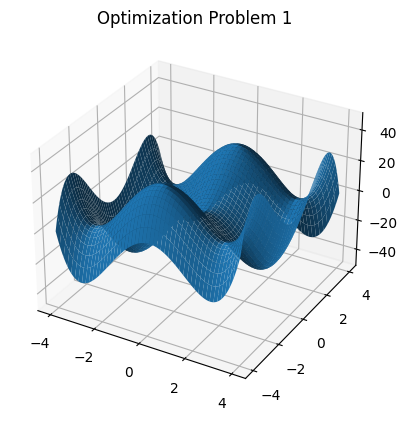

In [3]:
x1 = np.linspace(-4, 4, 1000)
x2 = np.linspace(-4, 4,1000)
xx, yy = np.meshgrid(x1, x2)
fx1x2 = f_x1x2(xx,yy)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, fx1x2)
plt.title('Optimization Problem 1')
plt.show()

In [4]:
def spo(max_iter = 300, theta = np.pi/4, m = 30, r = 0.95, n = 2):
    # Initial Guess
    guess = np.random.uniform(-4,4, (m,n))
    fx_value = f_x1x2(guess[:,0], guess[:,1])
    guess_star = guess[np.argmin(fx_value)]      
    # Rotation Matrix
    rot_matrix = r*np.eye(n)

    for i in range(n-1):
        for j in range(i+1):
            r_n = np.eye(n)
            r_n[n-i-2,n-i-2] = np.cos(theta)
            r_n[n-i-2,n-j-1] = -np.sin(theta)
            r_n[n-j-1,n-i-2] = np.sin(theta)
            r_n[n-j-1,n-j-1] = np.cos(theta)
            rot_matrix = rot_matrix.dot(r_n)
            
    # Update Algorithm 
    for k in range(max_iter):
        for i in range(guess.shape[0]):
            guess[i] = rot_matrix.dot(guess[i]) - (rot_matrix - np.eye(n)).dot(guess_star)
            for n_ in range(n):
                if guess[i,n_] < -4 :
                    guess[i,n_] += 4
                elif guess[i,n_] > 4:
                    guess[i,n_] -= 4                
        fx_value = f_x1x2(guess[:,0], guess[:,1])
        guess_star = guess[np.argmin(fx_value)]   
           
    return guess_star

In [5]:
sol = spo(max_iter= 100, m =30, r = 0.95)
print(f'Solution of the problem 1 is {sol}, with minimum value of {f_x1x2(sol[0], sol[1])}')


Solution of the problem 1 is [-2.90390197  0.15544355], with minimum value of -39.36176257764426


### Rastrigin Function   

\begin{equation}
f(\mathbf{x}) = \sum_{i=1}^n\left(x_i^2 - 10 \cos\left(2\pi x_1\right) + 10\right)
\end{equation}
with $x_i \in [-5,5] \quad \forall i = 1,2,\dots, n$

In [6]:
def f_x1x2(x1, x2):
    return x1**2 - 10*np.cos(2*np.pi*x1) + 10 + x2**2 - 10*np.cos(2*np.pi*x2) + 10

In [7]:

def spo(max_iter = 300, theta = np.pi/4, m = 30, r=0.95, n = 2):
    # Initial Guess
    guess = np.random.uniform(-5,5, (m,n))
    fx_value = f_x1x2(guess[:,0], guess[:,1])
    guess_star = guess[np.argmin(fx_value)]      
    
    # Rotation Matrix
    rot_matrix = r*np.eye(n)

    for i in range(n-1):
        for j in range(i+1):
            r_n = np.eye(n)
            r_n[n-i-2,n-i-2] = np.cos(theta)
            r_n[n-i-2,n-j-1] = -np.sin(theta)
            r_n[n-j-1,n-i-2] = np.sin(theta)
            r_n[n-j-1,n-j-1] = np.cos(theta)
            rot_matrix = rot_matrix.dot(r_n)
            
    # Update Algorithm 
    for k in range(max_iter):
        for i in range(guess.shape[0]):
            guess[i] = rot_matrix.dot(guess[i]) - (rot_matrix - np.eye(n)).dot(guess_star)
            for n_ in range(n):
                if guess[i,n_] < -5 :
                    guess[i,n_] += 5
                elif guess[i,n_] > 5:
                    guess[i,n_] -= 5                
        fx_value = f_x1x2(guess[:,0], guess[:,1])
        guess_star = guess[np.argmin(fx_value)]   
           
    return guess_star

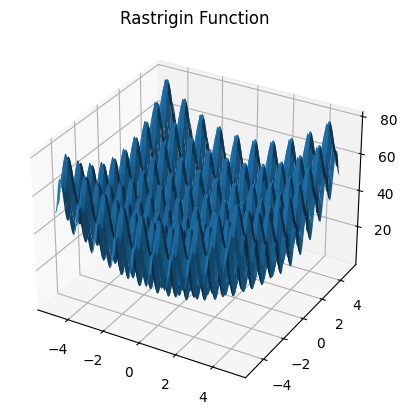

In [8]:
x1 = np.linspace(-5,5, 1000)
x2 = np.linspace(-5, 5,1000)
xx, yy = np.meshgrid(x1, x2)
fx1x2 = f_x1x2(xx,yy)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, fx1x2)
plt.title('Rastrigin Function')
plt.show()

In [9]:
sol = spo(max_iter = 200, m = 100, n = 2)
print(f'Solution of the Rastrigin Problem is {sol}, with minimum value of {f_x1x2(sol[0], sol[1])}')

TypeError: f_x1x2() missing 1 required positional argument: 'x2'

Suppose we want to expand Rastrigin Function for $n$-dimension then the code is as follow:

In [10]:
def f_x1x2(*x):
    fx = 0
    for i in range(len(x)):
        fx +=  x[i]**2 - 10*np.cos(2*np.pi*x[i]) + 10
    return fx

In [11]:
def spo(max_iter = 300, theta = np.pi/4, m = 30, r=0.95, n = 2):
    # Initial Guess
    guess = np.random.uniform(-5,5, (m,n))
    fx_value = f_x1x2(guess[:,0], guess[:,1])
    guess_star = guess[np.argmin(fx_value)]      
    
    # Rotation Matrix
    rot_matrix = r*np.eye(n)

    for i in range(n-1):
        for j in range(i+1):
            r_n = np.eye(n)
            r_n[n-i-2,n-i-2] = np.cos(theta)
            r_n[n-i-2,n-j-1] = -np.sin(theta)
            r_n[n-j-1,n-i-2] = np.sin(theta)
            r_n[n-j-1,n-j-1] = np.cos(theta)
            rot_matrix = rot_matrix.dot(r_n)
            
    # Update Algorithm 
    for k in range(max_iter):
        for i in range(guess.shape[0]):
            guess[i] = rot_matrix.dot(guess[i]) - (rot_matrix - np.eye(n)).dot(guess_star)
            for n_ in range(n):
                if guess[i,n_] < -5 :
                    guess[i,n_] += 5
                elif guess[i,n_] > 5:
                    guess[i,n_] -= 5
                fx_value[i] = 0                
                fx_value[i] += f_x1x2(guess[i,n_])
        guess_star = guess[np.argmin(fx_value)]   
           
    return guess_star

In [12]:
sol = spo(max_iter = 200, m = 100, n = 10)
print(f'Solution of the Rastrigin Problem is {sol}, with minimum value of {np.sum(f_x1x2(sol))}')

Solution of the Rastrigin Problem is [-5.63769596e-01  5.26047221e-01 -6.44647423e-01 -4.03894487e+00
  1.62813682e+00  6.23859003e-01  5.56869368e-01  2.68301910e+00
 -8.56135760e-01  8.03012126e-07], with minimum value of 155.44409003956594


## Final Thoughts
Bear in mind that this is a metaheuristics algorithm, meaning that the solution of the problem is not always the same (especially we use random number to make guesses). The main point of having or implementing different algorithm is to find the best solution with the cheapest computation costs.

## References

To be completly honest, I have not found a credible source to cite for SOA, I will only put a relevant source that I use to create this repository.  
[Spiral Optimization Algorithm](http://matematika.fmipa.unand.ac.id/images/bahan-seminar/Spiral_Optimization_Algorithm.pdf)